In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from scipy.stats import linregress
import scipy.stats as st

# Census Api Key
from config import (api_key)


In [32]:
all_census_data= pd.read_csv("all_census_data.csv")
all_census_data.head()

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Poverty Rate,...,House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,6,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,15.628107,...,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,8,5119329.0,206543.0,166348.0,40195.0,31109.0,660874.0,12.909387,...,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,529406.0,423995.0,105411.0,26236.0,3052807.0,15.990687,...,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,61592.0,63788.0,-2196.0,22568.0,240298.0,15.176422,...,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,143841.0,111680.0,32161.0,26809.0,614778.0,15.890988,...,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [60]:
#years=[2013,2014,2015,2016,2017,2018]

# Names for your columns
#column1 = "Mean of Trans by Age"
#column2 = "Travel Time to Work"
#column3 = "Population"

#census_pd = pd.DataFramestates_list=()
#years_df = pd.DataFrame()

#states_list=[]
#years_list=[]
#column1_data =[]
#column2_data =[]
#column3_data =[]


#for y in years:
#    c = Census(api_key, year=y)

#    census_data = c.acs5.get(("NAME", "B08101_001E", "B08303_001E", "B01003_001E" ), {'for': 'state:06,48,12,08,16,41'})

# Convert to DataFrame
#    census_pd = pd.DataFrame(census_data).sort_values("NAME",ascending=True)
#    census_pd = census_pd.reset_index()
    
#    year_column=[]
#    for i in range(len(census_pd["state"])):
#        year_column.append(y)
    
    
#    states_list.extend(census_pd["NAME"].tolist())
#    years_list.extend(year_column)
#    column1_data.extend(census_pd["B08101_001E"].tolist())
#    column2_data.extend(census_pd["B08303_001E"].tolist())
#    column3_data.extend(census_pd["B01003_001E"].tolist())    
    
#print(years_list)
#print(states_list)

#years_df["Year"] = years_list
#years_df["State Name"] = states_list
#years_df[column1] = column1_data
#years_df[column2] = column2_data
#years_df[column3] = column3_data
    
#years_df


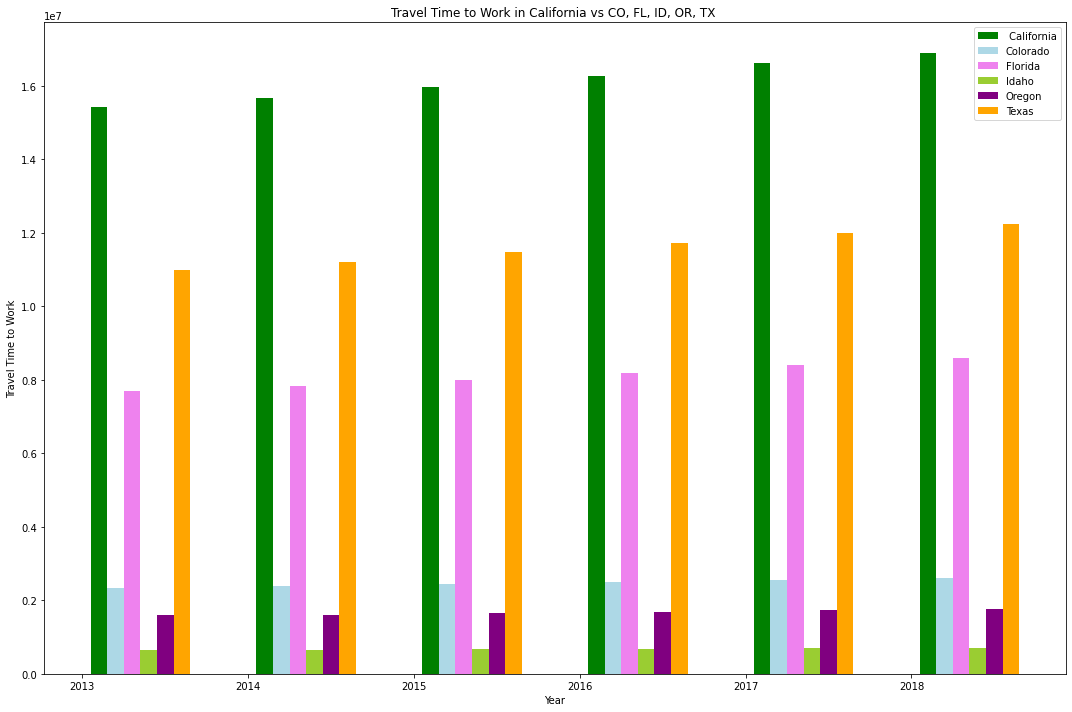

In [62]:
# Use the information from the DataFrame to create an array
labels = all_census_data["Year"].unique()


# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.10

# Create bar graph 
fig, ax = plt.subplots(figsize=(15,10))
fig1 = ax.bar(x_axis + (width), all_census_data.loc[all_census_data["State Name"]=="California"]["Travel Time to Work"], width, color = "green", label = " California")
fig2 = ax.bar(x_axis + (2 * width), all_census_data.loc[all_census_data["State Name"]=="Colorado"]["Travel Time to Work"], width, color = "lightblue", label = "Colorado")
fig3 = ax.bar(x_axis + (3 * width), all_census_data.loc[all_census_data["State Name"]=="Florida"]["Travel Time to Work"], width, color = "violet", label = "Florida")
fig4 = ax.bar(x_axis + (4 * width), all_census_data.loc[all_census_data["State Name"]=="Idaho"]["Travel Time to Work"], width, color = "yellowgreen", label = "Idaho")
fig5 = ax.bar(x_axis + (5 * width), all_census_data.loc[all_census_data["State Name"]=="Oregon"]["Travel Time to Work"], width, color = "purple", label = "Oregon")
fig6 = ax.bar(x_axis + (6 * width), all_census_data.loc[all_census_data["State Name"]=="Texas"]["Travel Time to Work"], width, color = "orange", label = "Texas")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Travel Time to Work")
ax.set_xlabel("Year")
ax.set_title("Travel Time to Work in California vs CO, FL, ID, OR, TX ")
ax.set_xticks(x_axis)
#ax.set_xticklabels(all_census_data["Year"])
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

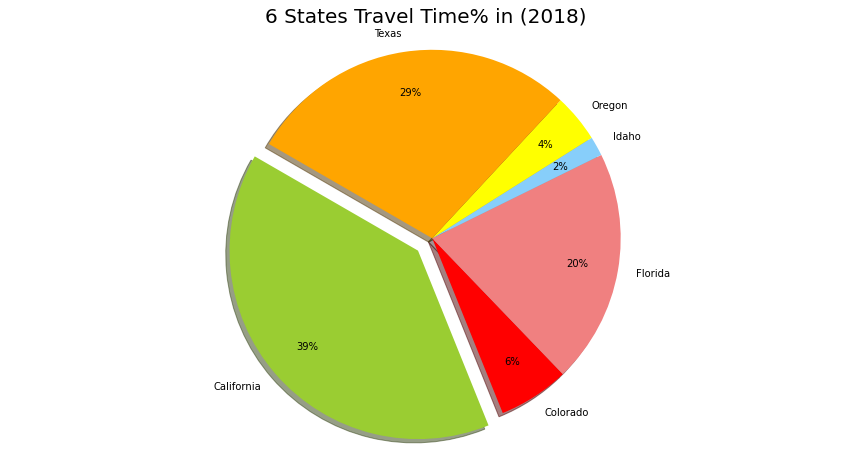

In [63]:
# DATA SET 3
labels = all_census_data["State Name"].unique()
time_to_work = all_census_data["Travel Time to Work"].loc[all_census_data['Year']==2018]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "orange"]
explode = (0.1,0,0,0,0,0)
fig = plt.figure(figsize = (15, 8))
plt.pie(time_to_work, explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", pctdistance=0.78, labeldistance=1.1, shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('6 States Travel Time% in (2018)',fontsize=(20))
plt.show()

The r-squared is: 0.9992231699987367


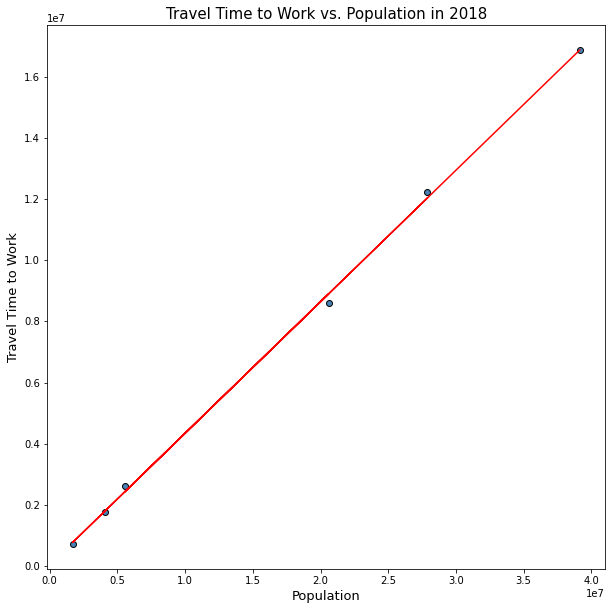

In [64]:
plt.figure(figsize=(10,10))
x_values = all_census_data["Population"].loc[all_census_data['Year']==2018]
y_values = all_census_data["Travel Time to Work"].loc[all_census_data['Year']==2018]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) +"x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (21,-150000), fontsize= 15, color="red")
plt.title("Travel Time to Work vs. Population in 2018", fontsize=(15))
plt.ylabel("Travel Time to Work", fontsize=(13))
plt.xlabel("Population", fontsize=(13))
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [17]:
cal_all_years = all_census_data.loc[all_census_data["State Name"]=="California"]

colorado_all_years = all_census_data.loc[all_census_data["State Name"]=="Colorado"]

florida_all_years = all_census_data.loc[all_census_data["State Name"]=="Florida"]

idaho_all_years = all_census_data.loc[all_census_data["State Name"]=="Idaho"]

oregon_all_years = all_census_data.loc[all_census_data["State Name"]=="Oregon"]

texas_all_years = all_census_data.loc[all_census_data["State Name"]=="Texas"]

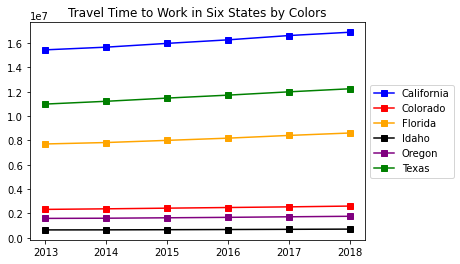

In [65]:
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Travel Time to Work"]
y_axis_co = colorado_all_years["Travel Time to Work"]
y_axis_fl = florida_all_years["Travel Time to Work"]
y_axis_id = idaho_all_years["Travel Time to Work"]
y_axis_or = oregon_all_years["Travel Time to Work"]
y_axis_tx = texas_all_years["Travel Time to Work"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")
plt.title("Travel Time to Work in Six States by Colors")
# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))